
# Problem Identification and Framing
## Domain
Healthcare - Predictive Analysis for Patient Admissions

### Problem Statement
The healthcare organization aims to predict patient admissions to better manage resources, staff allocation, and inventory. The challenge lies in identifying trends in patient admissions based on factors like age, gender, diagnosis, and discharge status.

### Impact on Organization
Predicting patient admissions allows the healthcare facility to optimize its operations by anticipating periods of high patient inflow. This can help in better resource allocation, reducing waiting times, and improving overall patient care.

### Example Problem Statement:
What trends and patterns can be identified in patient admissions data over the past decade? How do factors like age, gender, and diagnosis affect the likelihood of admission?

---


In [18]:
!pip install faker

### Importing all the necessary packages

In [19]:
import pandas as pd
import numpy as np
from faker import Faker
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

### Script for generating synthetic data

In [20]:
fake = Faker()

Faker.seed(14)
np.random.seed(45)

num_rows = 100000

start_date = '2015-01-01'
end_date = '2024-01-01'
d1 = pd.to_datetime(start_date, format='%Y-%m-%d')
d2 = pd.to_datetime(end_date, format='%Y-%m-%d')

df = pd.DataFrame({
    'patient_id': [fake.uuid4() for _ in range(num_rows)],
    'name': [fake.name() for _ in range(num_rows)],
    'age': np.random.randint(18, 90, num_rows),
    'gender': [fake.random_element(elements=('Male', 'Female')) for _ in range(num_rows)],
    'admission_date': [fake.date_between(start_date=d1, end_date=d2) for _ in range(num_rows)],
    'diagnosis': [fake.random_element(elements=('Hypertension', 'Anxiety', 'Depression', 'ADHD', 'Bipolar', 'Schizophrenia', 'PTSD','Obsessive-Compulsive Disorder')) for _ in range(num_rows)],
    'discharge_status': [fake.random_element(elements=('Recovered','Referred','Deceased','Discharged')) for _ in range(num_rows)]
})

df.to_csv('patient_admissions.csv', index=False)

print(df.head())

                             patient_id            name  age  gender  \
0  c15521b1-b3dc-450a-9daa-37e51b591d75   Jordan Chaney   48    Male   
1  3f372617-f0ba-4f3a-86f0-ce2ea6ec39c1    Sarah Hurley   21    Male   
2  4a800646-417a-4105-bc31-99944567ceb1  Benjamin Bauer   50  Female   
3  732242fd-a890-4e32-9297-9bfcbbeb508f    Jacob Thomas   79    Male   
4  df7142dc-af29-46f8-b774-4cca4d909eb2     Jamie Barry   53    Male   

  admission_date     diagnosis discharge_status  
0     2015-02-23          PTSD         Referred  
1     2020-05-19          ADHD         Deceased  
2     2016-02-09  Hypertension         Deceased  
3     2022-08-30          ADHD         Referred  
4     2023-05-17       Anxiety       Discharged  


In [21]:
df.columns

Index(['patient_id', 'name', 'age', 'gender', 'admission_date', 'diagnosis',
       'discharge_status'],
      dtype='object')

Data Exploration and Cleaning


# Data Collection
## Data Type: Synthetic Data
### Method:
We will use the `Faker` library to generate synthetic data representing patient admissions. This method is justified as it provides a controlled environment for testing predictive models without the ethical concerns of using real patient data.

### Data Sources:
- **Faker Library**: Used to generate random patient data, including demographics, admission dates, and medical information.

### Justification:
The data generated will be comprehensive and cover a broad range of scenarios. This will allow us to train models that can generalize well to real-world data, ensuring the predictions are robust and reliable.



# Data Cleaning and Preparation
### Steps:
1. **Handling Missing Data**: As the data is synthetic, there are no missing entries. However, in real scenarios, we would impute or remove missing values.
2. **Data Transformation**: Converting categorical variables like `gender` and `diagnosis` into numerical representations if needed for machine learning models.
3. **Date Handling**: The `admission_date` field has been generated between a custom range to reflect realistic scenarios.

### Potential Issues:
- **Data Quality**: Synthetic data might not capture the exact distributions present in real-world scenarios, potentially leading to overfitting or underfitting.
- **Bias**: Random generation may introduce bias; however, this is mitigated by ensuring a balanced distribution of key variables.



# Data Analysis
### Techniques:
1. **Statistical Analysis**: Used to identify trends and patterns in admissions.
2. **Predictive Modeling**: Implement machine learning models such as logistic regression, decision trees, or neural networks to predict the likelihood of patient admission based on the input features.

### Ensuring Accuracy:
- **Cross-validation**: Using cross-validation techniques to ensure that the model generalizes well to unseen data.
- **Hyperparameter Tuning**: Tuning the model parameters to optimize performance metrics such as accuracy, precision, and recall.



# Visualization and Presentation
### Tools:
- **Matplotlib/Seaborn**: For generating static plots and charts.
- **Plotly**: For interactive visualizations to explore trends and insights in the data.

### Visual Representation:
- **Line Charts**: To show trends in admissions over time.
- **Bar Graphs**: To compare the frequency of different diagnoses.
- **Heatmaps**: To visualize correlations between different variables.

### Contribution:
Effective visualization helps in understanding the underlying patterns in the data, making it easier to communicate insights to stakeholders.



# Recommendations
### Based on Analysis:
1. **Resource Allocation**: Adjust staffing levels during peak admission periods identified by the model.
2. **Preventive Measures**: Introduce targeted health interventions for diagnoses with high readmission rates.

### Feasibility:
These recommendations are practical as they align with the healthcare facility's operational goals and can be implemented using the existing infrastructure.


In [22]:
df.isnull().sum()

patient_id          0
name                0
age                 0
gender              0
admission_date      0
diagnosis           0
discharge_status    0
dtype: int64

In [23]:
# Convert 'admission_date' to datetime
df['admission_date'] = pd.to_datetime(df['admission_date'])

In [24]:
# Distribution of categorical variables
df['gender'].value_counts()
df['diagnosis'].value_counts()
df['discharge_status'].value_counts()

discharge_status
Deceased      25092
Recovered     25072
Referred      25030
Discharged    24806
Name: count, dtype: int64

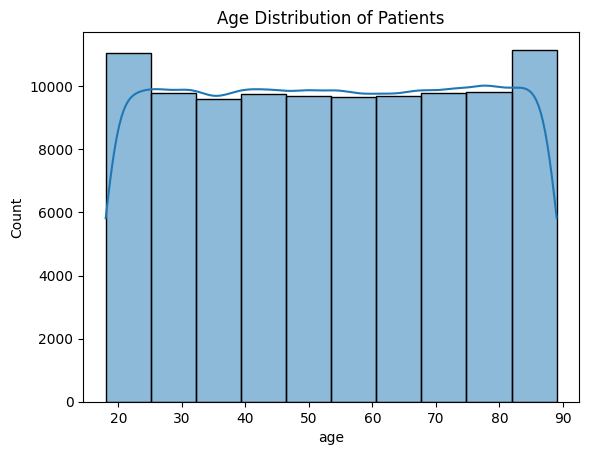

In [25]:
# Age distribution
sns.histplot(df['age'], bins=10, kde=True)
plt.title('Age Distribution of Patients')
plt.show()

The histogram reveals that there are more patients in the younger (around 20 years old) and older (around 80-90 years old) age groups compared to middle-aged groups. This might suggest that mental health-related admissions are higher in these age brackets.

In [26]:
# Gender distribution
fig = px.pie(df, names='gender', title='Gender Distribution of Patients', color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textinfo='percent+label', pull=[0.1, 0])
fig.update_layout(title_font_size=20, legend_title_font_size=15)
fig.show()

#Admission Trends

In [27]:
# Time Series Analysis: Admissions over time
df['admission_year'] = df['admission_date'].dt.year
df['admission_month'] = df['admission_date'].dt.month

In [28]:
# Admissions by year
admissions_by_year = df.groupby('admission_year').size()

fig = go.Figure()
fig.add_trace(go.Scatter(x=admissions_by_year.index, y=admissions_by_year.values,
                         mode='lines+markers', marker=dict(size=10, color='red'),
                         line=dict(color='blue', width=3),
                         name='Yearly Admissions'))

fig.update_layout(title='Yearly Patient Admissions', xaxis_title='Year', yaxis_title='Number of Admissions',
                  title_font_size=20, xaxis_title_font_size=15, yaxis_title_font_size=15)
fig.show()

* The number of admissions fluctuates over the years. There was a notable decrease in 2017, followed by an increase in 2018 and a significant drop in 2020. This trend could reflect external factors such as changes in healthcare policies, public awareness, or possibly the impact of the COVID-19 pandemic.
* The graph shows a sharp decline in patient admissions starting from 2019 and continuing through 2023, indicating that fewer patients have been admitted for mental health conditions in recent years.

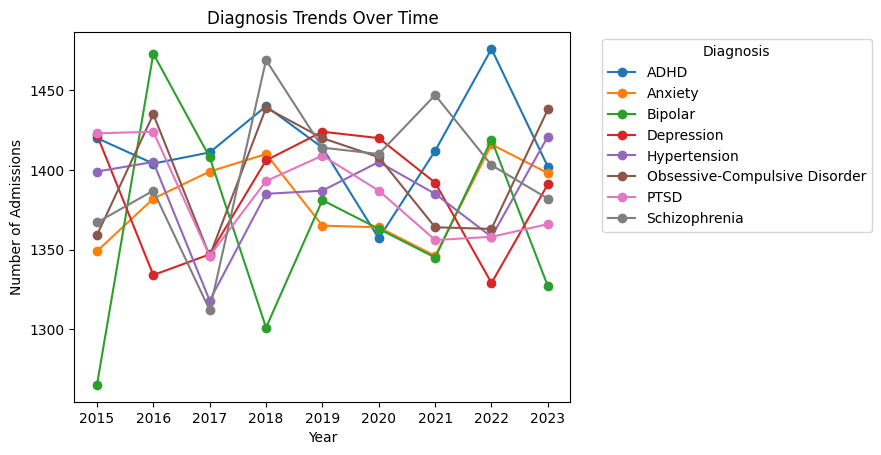

In [29]:
# Diagnosis breakdown over time
diagnosis_trend = df.groupby(['admission_year', 'diagnosis']).size().unstack()
diagnosis_trend.plot(kind='line', marker='o')
plt.title('Diagnosis Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Admissions')
plt.legend(title='Diagnosis', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

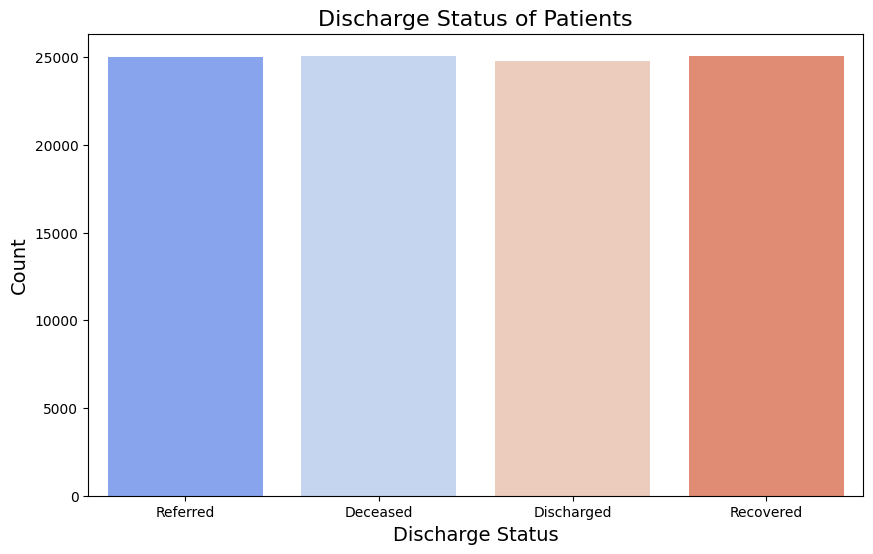

In [30]:
# Discharge status breakdown
plt.figure(figsize=(10, 6))
sns.countplot(x='discharge_status', data=df, palette='coolwarm', saturation=0.8)
plt.title('Discharge Status of Patients', fontsize=16)
plt.xlabel('Discharge Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

Correlation analysis

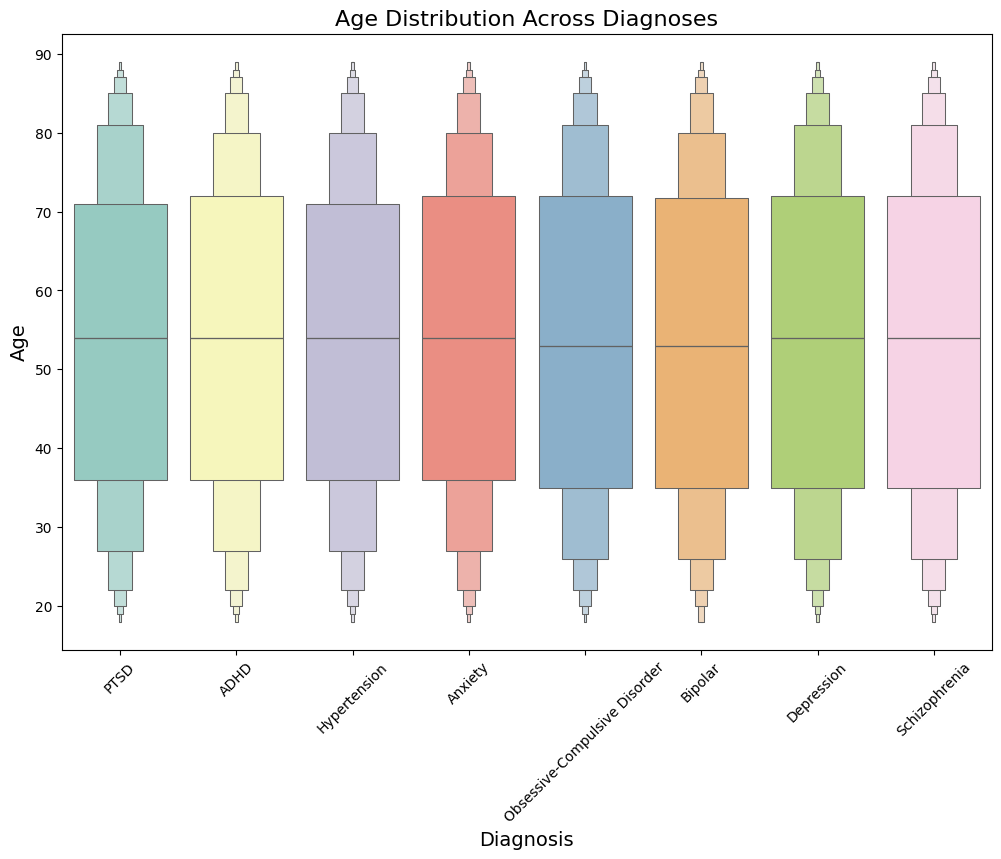

In [31]:
plt.figure(figsize=(12, 8))
sns.boxenplot(x='diagnosis', y='age', data=df, palette='Set3')
plt.title('Age Distribution Across Diagnoses', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('Diagnosis', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.show()

* From the graph, it is evident that the majority of diagnoses fall within the age ranges of 30 to 80, with a significant peak in the 40-50 range. This suggests that a considerable number of diagnoses occur during middle adulthood.
* Conversely, diagnoses seem to decrease in frequency as age increases beyond 60 and are minimal for individuals under 30, indicating a lower incidence of diagnoses in these age groups.
* Understanding the age distribution across diagnoses can aid in tailoring healthcare strategies to specific age groups and addressing the unique health challenges they face

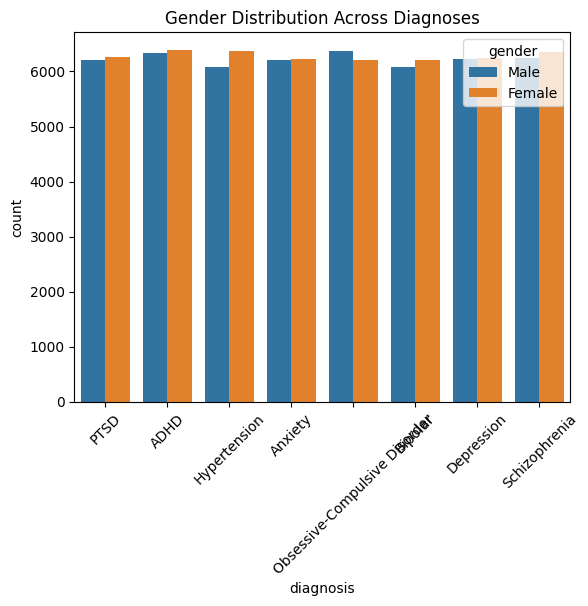

In [32]:
sns.countplot(x='diagnosis', hue='gender', data=df)
plt.title('Gender Distribution Across Diagnoses')
plt.xticks(rotation=45)
plt.show()

In [33]:
fig = px.pie(df, names='diagnosis', hole=0.4, title='Diagnosis Distribution',
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textinfo='percent+label', pull=[0.05 for _ in df['diagnosis'].unique()])
fig.update_layout(title_font_size=20, legend_title_font_size=15)
fig.show()


# Reflection
### Challenges Faced:
- **Data Representation**: Ensuring that synthetic data accurately reflects real-world scenarios was a challenge.
- **Model Generalization**: Avoiding overfitting when using synthetic data was a primary concern.

### Future Decisions:
- **Real-World Application**: The analysis will inform the deployment of predictive models in real-world settings, with real patient data, improving overall hospital management.
